In [25]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [26]:
fraud = pd.read_excel('fraudulent 38.xlsx', converters={'Global Company Key':str})

In [27]:
fraud

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,ISO Currency Code,Assets - Total,Active/Inactive Status Marker,GIC Industries
0,030477,2010-09-30,2010.0,INDL,C,D,STD,MATW,USD,993.825,A,202010
1,030477,2011-09-30,2011.0,INDL,C,D,STD,MATW,USD,1097.455,A,202010
2,030477,2012-09-30,2012.0,INDL,C,D,STD,MATW,USD,1128.042,A,202010
3,030477,2013-09-30,2013.0,INDL,C,D,STD,MATW,USD,1214.927,A,202010
4,030477,2014-09-30,2014.0,INDL,C,D,STD,MATW,USD,2024.048,A,202010
...,...,...,...,...,...,...,...,...,...,...,...,...
111,008247,2018-12-31,2018.0,INDL,C,D,STD,PPG,USD,16015.000,A,151010
112,025776,2017-06-30,2017.0,INDL,C,D,STD,SFEG,USD,1.228,I,151040
113,014913,2019-02-28,2018.0,INDL,C,D,STD,AUSI,USD,0.668,A,201040
114,025166,2015-12-31,2015.0,INDL,C,D,STD,KOPN,USD,106.060,A,453010


In [28]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Global Company Key                                  116 non-null    object        
 1   Data Date                                           116 non-null    datetime64[ns]
 2   Data Year - Fiscal                                  114 non-null    float64       
 3   Industry Format                                     116 non-null    object        
 4   Level of Consolidation - Company Annual Descriptor  116 non-null    object        
 5   Population Source                                   116 non-null    object        
 6   Data Format                                         116 non-null    object        
 7   Ticker Symbol                                       116 non-null    object        
 8   ISO Curren

In [29]:
fraud['GIC Industries'].nunique()

29

There are 29 unique GIC Industries id

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='GIC Industries', ylabel='count'>

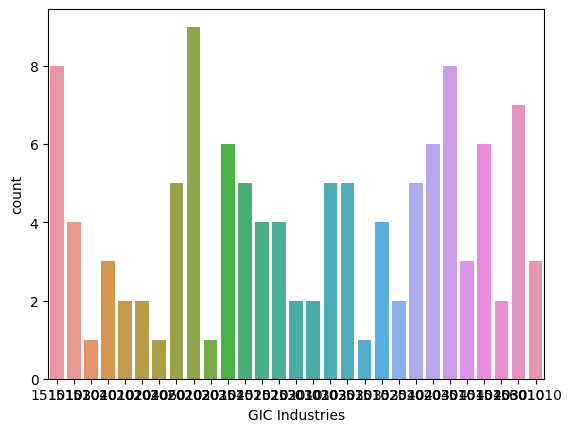

In [31]:
sns.countplot(data=fraud, x='GIC Industries')

In [32]:
#getting unique GIC id to filter from non-fraudulent dataset
unique_fraud_GIC = fraud['GIC Industries'].unique()


In [33]:
len(unique_fraud_GIC)

29

In [34]:
df_GIC=fraud.groupby(['GIC Industries']).sum()['Assets - Total'].sort_values(ascending=False).to_frame().reset_index()

In [35]:
df_GIC

,GIC Industries,Assets - Total
0,302020,467277.194
1,151010,142707.691
2,352020,75332.180
3,403010,61890.600
4,201020,60560.000
5,301010,33228.865
6,601010,26349.489
7,252020,23295.748
8,251010,20995.000
9,151030,16369.536


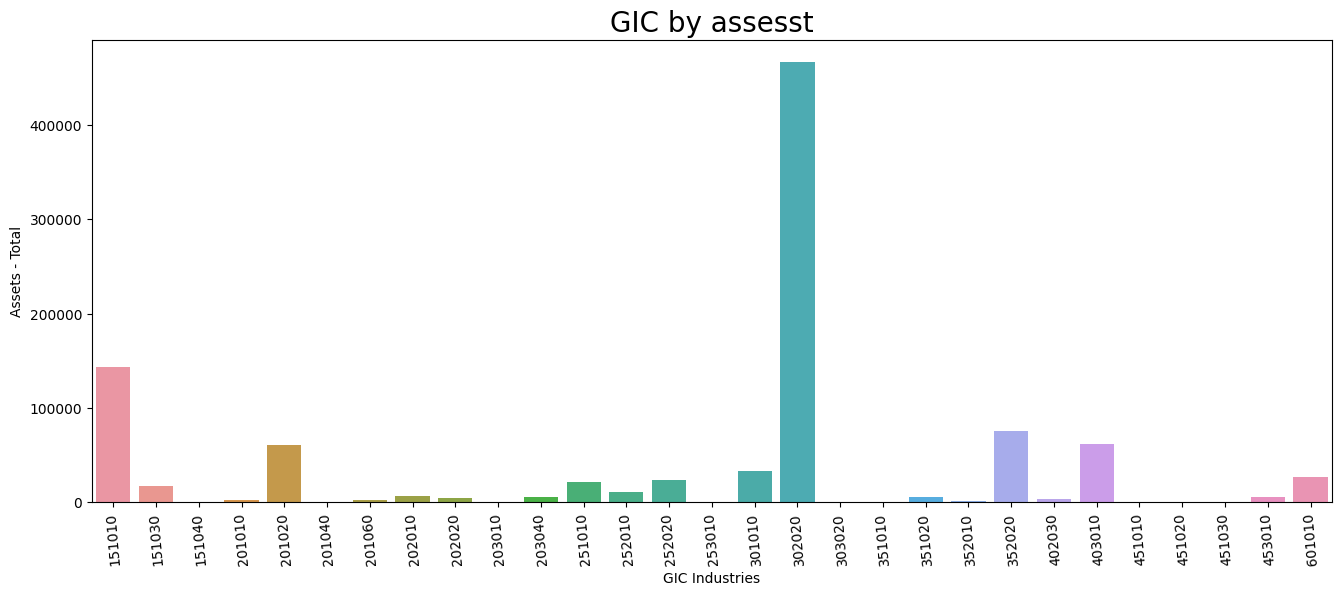

In [36]:
fig = plt.figure(figsize=(16,6))

sns.barplot(data=df_GIC,x='GIC Industries', y='Assets - Total', ).set_title("GIC by assesst", size=20)
plt.xticks(rotation=95);

Read entire database

In [37]:
df = pd.read_excel("entire database.xl.xlsx", converters={'Global Company Key':str})

In [38]:
df[df['GIC Industries'].isin(df_GIC['GIC Industries'])]['Global Company Key'].unique().shape

(8072,)

There are 8072 company ids matching Fraudulent GIC Industry id

In [39]:
df[~df['GIC Industries'].isin(df_GIC['GIC Industries'])]['Global Company Key'].unique().shape

(11724,)

There are 11724 Company key not matching Fraudulent GIC industry Id

In [40]:
df

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,ISO Currency Code,Assets - Total,Active/Inactive Status Marker,GIC Industries
0,001004,2010-05-31,2009.0,INDL,C,D,STD,AIR,USD,1501.042,A,201010.0
1,001004,2011-05-31,2010.0,INDL,C,D,STD,AIR,USD,1703.727,A,201010.0
2,001004,2012-05-31,2011.0,INDL,C,D,STD,AIR,USD,2195.653,A,201010.0
3,001004,2013-05-31,2012.0,INDL,C,D,STD,AIR,USD,2136.900,A,201010.0
4,001004,2014-05-31,2013.0,INDL,C,D,STD,AIR,USD,2199.500,A,201010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152876,351590,2019-12-31,2019.0,INDL,C,D,STD,DTRUY,USD,62131.888,A,201060.0
152877,351590,2020-12-31,2020.0,INDL,C,D,STD,DTRUY,USD,60256.041,A,201060.0
152878,351590,2021-12-31,2021.0,INDL,C,D,STD,DTRUY,USD,62325.449,A,201060.0
152879,353444,2021-12-31,2021.0,INDL,C,D,STD,HLN,USD,46650.000,A,303020.0
